In [197]:
from sympy import *
import numpy as np
import itertools as it
import IPython.display as disp

init_printing()

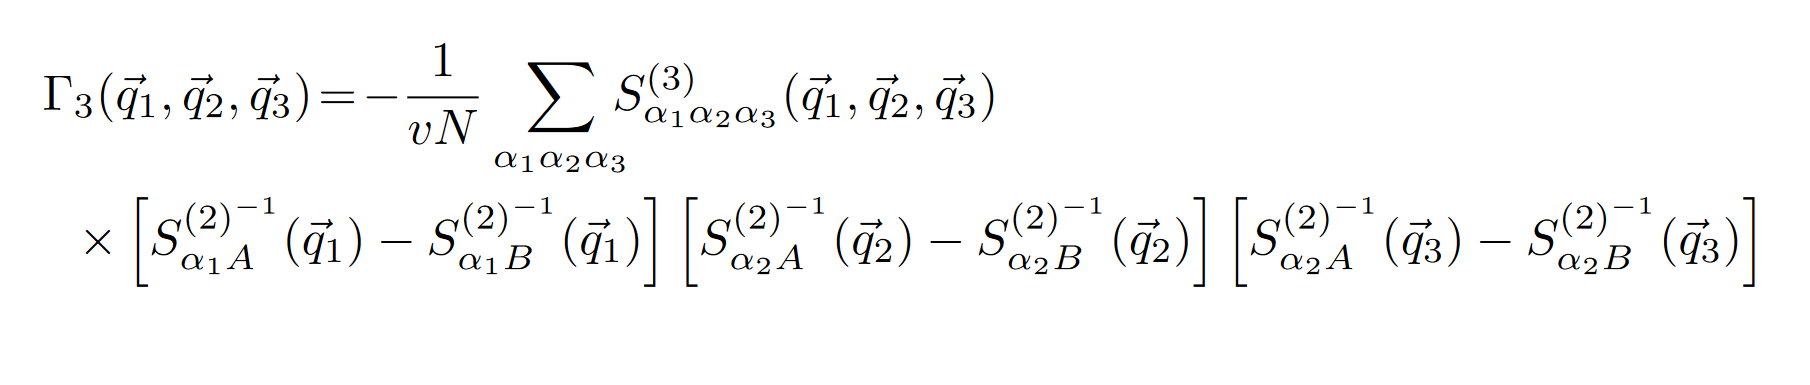

In [268]:
var("S_AAA S_AAB S_ABB S_BBB S_AAinv S_ABinv S_BBinv DEL_B DEL_A")
# IT IS IMPLIED THAT the two point sfs are INVERSE sfs

In [267]:
S2 = Matrix([[S_AAinv, S_ABinv],[S_ABinv, S_BBinv]])
S2
#AGAIN THIS IS THE INVERSE MATRIX; "S_AA" here means -S_BB / det(S2)

⎡S_AAinv  S_ABinv⎤
⎢                ⎥
⎣S_ABinv  S_BBinv⎦

In [4]:
S3 = Matrix([[[S_AAA, S_AAB],[S_AAB, S_ABB]],[[S_AAB, S_ABB],[S_ABB, S_BBB]]])
S3

Matrix([
[[S_AAA, S_AAB], [S_AAB, S_ABB]],
[[S_AAB, S_ABB], [S_ABB, S_BBB]]])

In [241]:
S2np = np.array([[S_AAinv, S_ABinv],[S_ABinv, S_BBinv]])
S2np

array([[S_AAinv, S_ABinv],
       [S_ABinv, S_BBinv]], dtype=object)

In [242]:
S3np = np.array([[[S_AAA, S_AAB],[S_AAB, S_ABB]],[[S_AAB, S_ABB],[S_ABB, S_BBB]]])
S3np

array([[[S_AAA, S_AAB],
        [S_AAB, S_ABB]],

       [[S_AAB, S_ABB],
        [S_ABB, S_BBB]]], dtype=object)

In [243]:
front = np.matmul(S3np, S2np)
front

array([[[S_AAA*S_AAinv + S_AAB*S_ABinv, S_AAA*S_ABinv + S_AAB*S_BBinv],
        [S_AAB*S_AAinv + S_ABB*S_ABinv, S_AAB*S_ABinv + S_ABB*S_BBinv]],

       [[S_AAB*S_AAinv + S_ABB*S_ABinv, S_AAB*S_ABinv + S_ABB*S_BBinv],
        [S_AAinv*S_ABB + S_ABinv*S_BBB, S_ABB*S_ABinv + S_BBB*S_BBinv]]],
      dtype=object)

In [244]:
top = np.swapaxes(front, 1, 2) #TOP!!
top

array([[[S_AAA*S_AAinv + S_AAB*S_ABinv, S_AAB*S_AAinv + S_ABB*S_ABinv],
        [S_AAA*S_ABinv + S_AAB*S_BBinv, S_AAB*S_ABinv + S_ABB*S_BBinv]],

       [[S_AAB*S_AAinv + S_ABB*S_ABinv, S_AAinv*S_ABB + S_ABinv*S_BBB],
        [S_AAB*S_ABinv + S_ABB*S_BBinv, S_ABB*S_ABinv + S_BBB*S_BBinv]]],
      dtype=object)

In [245]:
top = np.matmul(top, S2np)
top

array([[[S_AAinv*(S_AAA*S_AAinv + S_AAB*S_ABinv) + S_ABinv*(S_AAB*S_AAinv + S_ABB*S_ABinv),
         S_ABinv*(S_AAA*S_AAinv + S_AAB*S_ABinv) + S_BBinv*(S_AAB*S_AAinv + S_ABB*S_ABinv)],
        [S_AAinv*(S_AAA*S_ABinv + S_AAB*S_BBinv) + S_ABinv*(S_AAB*S_ABinv + S_ABB*S_BBinv),
         S_ABinv*(S_AAA*S_ABinv + S_AAB*S_BBinv) + S_BBinv*(S_AAB*S_ABinv + S_ABB*S_BBinv)]],

       [[S_AAinv*(S_AAB*S_AAinv + S_ABB*S_ABinv) + S_ABinv*(S_AAinv*S_ABB + S_ABinv*S_BBB),
         S_ABinv*(S_AAB*S_AAinv + S_ABB*S_ABinv) + S_BBinv*(S_AAinv*S_ABB + S_ABinv*S_BBB)],
        [S_AAinv*(S_AAB*S_ABinv + S_ABB*S_BBinv) + S_ABinv*(S_ABB*S_ABinv + S_BBB*S_BBinv),
         S_ABinv*(S_AAB*S_ABinv + S_ABB*S_BBinv) + S_BBinv*(S_ABB*S_ABinv + S_BBB*S_BBinv)]]],
      dtype=object)

In [246]:
front_again = np.swapaxes(top, 2, 1)
front_again

array([[[S_AAinv*(S_AAA*S_AAinv + S_AAB*S_ABinv) + S_ABinv*(S_AAB*S_AAinv + S_ABB*S_ABinv),
         S_AAinv*(S_AAA*S_ABinv + S_AAB*S_BBinv) + S_ABinv*(S_AAB*S_ABinv + S_ABB*S_BBinv)],
        [S_ABinv*(S_AAA*S_AAinv + S_AAB*S_ABinv) + S_BBinv*(S_AAB*S_AAinv + S_ABB*S_ABinv),
         S_ABinv*(S_AAA*S_ABinv + S_AAB*S_BBinv) + S_BBinv*(S_AAB*S_ABinv + S_ABB*S_BBinv)]],

       [[S_AAinv*(S_AAB*S_AAinv + S_ABB*S_ABinv) + S_ABinv*(S_AAinv*S_ABB + S_ABinv*S_BBB),
         S_AAinv*(S_AAB*S_ABinv + S_ABB*S_BBinv) + S_ABinv*(S_ABB*S_ABinv + S_BBB*S_BBinv)],
        [S_ABinv*(S_AAB*S_AAinv + S_ABB*S_ABinv) + S_BBinv*(S_AAinv*S_ABB + S_ABinv*S_BBB),
         S_ABinv*(S_AAB*S_ABinv + S_ABB*S_BBinv) + S_BBinv*(S_ABB*S_ABinv + S_BBB*S_BBinv)]]],
      dtype=object)

In [247]:
#REAL side
side = np.rot90(front_again, 1, (0,2))
side

array([[[S_AAinv*(S_AAA*S_ABinv + S_AAB*S_BBinv) + S_ABinv*(S_AAB*S_ABinv + S_ABB*S_BBinv),
         S_AAinv*(S_AAB*S_ABinv + S_ABB*S_BBinv) + S_ABinv*(S_ABB*S_ABinv + S_BBB*S_BBinv)],
        [S_ABinv*(S_AAA*S_ABinv + S_AAB*S_BBinv) + S_BBinv*(S_AAB*S_ABinv + S_ABB*S_BBinv),
         S_ABinv*(S_AAB*S_ABinv + S_ABB*S_BBinv) + S_BBinv*(S_ABB*S_ABinv + S_BBB*S_BBinv)]],

       [[S_AAinv*(S_AAA*S_AAinv + S_AAB*S_ABinv) + S_ABinv*(S_AAB*S_AAinv + S_ABB*S_ABinv),
         S_AAinv*(S_AAB*S_AAinv + S_ABB*S_ABinv) + S_ABinv*(S_AAinv*S_ABB + S_ABinv*S_BBB)],
        [S_ABinv*(S_AAA*S_AAinv + S_AAB*S_ABinv) + S_BBinv*(S_AAB*S_AAinv + S_ABB*S_ABinv),
         S_ABinv*(S_AAB*S_AAinv + S_ABB*S_ABinv) + S_BBinv*(S_AAinv*S_ABB + S_ABinv*S_BBB)]]],
      dtype=object)

In [248]:
final = np.matmul(side, S2np)
final

array([[[S_AAinv*(S_AAinv*(S_AAA*S_ABinv + S_AAB*S_BBinv) + S_ABinv*(S_AAB*S_ABinv + S_ABB*S_BBinv)) + S_ABinv*(S_AAinv*(S_AAB*S_ABinv + S_ABB*S_BBinv) + S_ABinv*(S_ABB*S_ABinv + S_BBB*S_BBinv)),
         S_ABinv*(S_AAinv*(S_AAA*S_ABinv + S_AAB*S_BBinv) + S_ABinv*(S_AAB*S_ABinv + S_ABB*S_BBinv)) + S_BBinv*(S_AAinv*(S_AAB*S_ABinv + S_ABB*S_BBinv) + S_ABinv*(S_ABB*S_ABinv + S_BBB*S_BBinv))],
        [S_AAinv*(S_ABinv*(S_AAA*S_ABinv + S_AAB*S_BBinv) + S_BBinv*(S_AAB*S_ABinv + S_ABB*S_BBinv)) + S_ABinv*(S_ABinv*(S_AAB*S_ABinv + S_ABB*S_BBinv) + S_BBinv*(S_ABB*S_ABinv + S_BBB*S_BBinv)),
         S_ABinv*(S_ABinv*(S_AAA*S_ABinv + S_AAB*S_BBinv) + S_BBinv*(S_AAB*S_ABinv + S_ABB*S_BBinv)) + S_BBinv*(S_ABinv*(S_AAB*S_ABinv + S_ABB*S_BBinv) + S_BBinv*(S_ABB*S_ABinv + S_BBB*S_BBinv))]],

       [[S_AAinv*(S_AAinv*(S_AAA*S_AAinv + S_AAB*S_ABinv) + S_ABinv*(S_AAB*S_AAinv + S_ABB*S_ABinv)) + S_ABinv*(S_AAinv*(S_AAB*S_AAinv + S_ABB*S_ABinv) + S_ABinv*(S_AAinv*S_ABB + S_ABinv*S_BBB)),
         S_ABinv

In [259]:
#GAMMA 3 MATRIX RESULT
S3np = np.array([[[S_AAA, S_AAB],[S_AAB, S_ABB]],[[S_AAB, S_ABB],[S_ABB, S_BBB]]])
S2np = np.array([[S_AAinv, S_ABinv],[S_ABinv, S_BBinv]])
front = np.matmul(S3np, S2np)
top = np.swapaxes(front, 1, 2) #TOP!!
top = np.matmul(top, S2np)
front_again = np.swapaxes(top, 2, 1)
side = np.rot90(front_again, 1, (0,2))
final = np.matmul(side, S2np)
final = np.rot90(final, 3, (0,2))

final

array([[[S_AAinv*(S_AAinv*(S_AAA*S_AAinv + S_AAB*S_ABinv) + S_ABinv*(S_AAB*S_AAinv + S_ABB*S_ABinv)) + S_ABinv*(S_AAinv*(S_AAB*S_AAinv + S_ABB*S_ABinv) + S_ABinv*(S_AAinv*S_ABB + S_ABinv*S_BBB)),
         S_AAinv*(S_AAinv*(S_AAA*S_ABinv + S_AAB*S_BBinv) + S_ABinv*(S_AAB*S_ABinv + S_ABB*S_BBinv)) + S_ABinv*(S_AAinv*(S_AAB*S_ABinv + S_ABB*S_BBinv) + S_ABinv*(S_ABB*S_ABinv + S_BBB*S_BBinv))],
        [S_AAinv*(S_ABinv*(S_AAA*S_AAinv + S_AAB*S_ABinv) + S_BBinv*(S_AAB*S_AAinv + S_ABB*S_ABinv)) + S_ABinv*(S_ABinv*(S_AAB*S_AAinv + S_ABB*S_ABinv) + S_BBinv*(S_AAinv*S_ABB + S_ABinv*S_BBB)),
         S_AAinv*(S_ABinv*(S_AAA*S_ABinv + S_AAB*S_BBinv) + S_BBinv*(S_AAB*S_ABinv + S_ABB*S_BBinv)) + S_ABinv*(S_ABinv*(S_AAB*S_ABinv + S_ABB*S_BBinv) + S_BBinv*(S_ABB*S_ABinv + S_BBB*S_BBinv))]],

       [[S_ABinv*(S_AAinv*(S_AAA*S_AAinv + S_AAB*S_ABinv) + S_ABinv*(S_AAB*S_AAinv + S_ABB*S_ABinv)) + S_BBinv*(S_AAinv*(S_AAB*S_AAinv + S_ABB*S_ABinv) + S_ABinv*(S_AAinv*S_ABB + S_ABinv*S_BBB)),
         S_ABinv

In [260]:
# expand(final[0][0][0])

In [251]:
# for I0, I1, I2 in it.product([0,1], repeat=3):
#     disp.display(expand(final[I0][I1][I2]))

In [261]:
one = np.matmul(final, DEL)
two = np.matmul(one, DEL)
three = np.matmul(two, DEL)
expand(three)

In [262]:
DEL_incomp = np.array([DEL_A, -DEL_A])
DEL_incomp

array([DEL_A, -DEL_A], dtype=object)

In [263]:
one = np.matmul(final, DEL_incomp)
two = np.matmul(one, DEL_incomp)
three = np.matmul(two, DEL_incomp)
expand(three)

In [264]:
factor(three)

In [258]:
expand((S_AB - S_BB)*(S_AB - S_BB)*(S_AB - S_BB))